In [1]:
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
crassus = pd.read_csv("crassus_results.tsv.gz", delimiter="\t", compression='gzip')
crassus

,crassus_id,contig,sample,length,length/ref,ref,DTR,coding,family,subfamily,genus,species,evidence_family,evidence_genus,notes,discard
0,IBD-crossAssembled_1_182976,contig_241570,IBD-crossAssembled,182976,0.978,Zeta_2,True,11,Zeta,Zeta,Zeta_2,species__72,"phylogenies, shared_prots","ani, shared_prots",NaN,False
1,IBD-crossAssembled_2_178222,contig_8225,IBD-crossAssembled,178222,0.975,Zeta_3_1,False,11,Zeta,Zeta,Zeta_3,Zeta_3_1,"phylogenies, shared_prots","ani, shared_prots, phylogenies",NaN,False
2,IBD-crossAssembled_4_145297,contig_1091,IBD-crossAssembled,145297,0.954,Epsilon_2_3,False,11,Epsilon,Epsilon,Epsilon_2,Epsilon_2_3,"phylogenies, shared_prots","ani, shared_prots, phylogenies",NaN,False
3,IBD-crossAssembled_7_141010,contig_1857,IBD-crossAssembled,141010,0.922,Epsilon_1,False,11,Epsilon,Epsilon,Epsilon_1,species__92,"phylogenies, shared_prots","ani, shared_prots, phylogenies",NaN,False
4,IBD-crossAssembled_16_113452,contig_17571,IBD-crossAssembled,113452,0.640,Zeta_7_1,False,TGA,Zeta,Zeta,Zeta_7,Zeta_7_1,"phylogenies, shared_prots","ani, shared_prots, phylogenies",NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,IBD-crossAssembled_3122_11376,contig_7298,IBD-crossAssembled,11376,0.118,Buorbuivirus,False,TAG,Suoliviridae,Loutivirinae,Buorbuivirus,species__173,"phylogenies, shared_prots",ani,NaN,False
107,IBD-crossAssembled_3177_11243,contig_20815,IBD-crossAssembled,11243,0.113,Kolpuevirus hominis,False,11,Steigviridae,Asinivirinae,Kolpuevirus,Kolpuevirus hominis,"phylogenies, shared_prots","ani, shared_prots, phylogenies",NaN,False
108,IBD-crossAssembled_3515_10591,contig_239060,IBD-crossAssembled,10591,0.109,Carjivirus communis,False,11,Intestiviridae,Crudevirinae,Carjivirus,Carjivirus communis,"phylogenies, shared_prots","ani, shared_prots, phylogenies",NaN,False
109,IBD-crossAssembled_3720_10264,contig_240585,IBD-crossAssembled,10264,0.112,Dabirmavirus,False,11,Intestiviridae,Crudevirinae,Dabirmavirus,species__174,"phylogenies, shared_prots",ani,NaN,False


In [265]:
sample_seq_counts = pd.read_csv("sampleSeqCounts.tsv.gz", delimiter="\t", compression='gzip', header=None, names=['sample', 'total_reads'])
sample_seq_counts = sample_seq_counts.set_index('sample')
sample_seq_counts

,total_reads
sample,
7544,1002642
7547,1160469
7548,987046
7550,612295
7553,807954
...,...
38207,1606090
38208,1329621
38209,742984


In [3]:
crassshort = crassus[['contig', 'length', 'ref', 'coding', 'family']]

In [4]:
contigs = pd.read_csv("crass_contigs.tsv.gz", delimiter="\t", compression='gzip')
contigs

,sample,contig,length,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,medianFold
0,7544,contig_10493,18937,2,0.06,0.06,0.35,0.05,0.3441,4.18,792,0.28
1,7544,contig_1091,145297,3,0.01,0.01,0.03,0.01,0.3817,0.50,724,0.07
2,7544,contig_12034,21580,485,11.80,11.78,57.58,9.03,0.3575,85.35,18418,8.32
3,7544,contig_12041,29559,266,4.73,4.73,20.76,3.25,0.3691,66.94,19786,4.40
4,7544,contig_12042,11863,108,4.78,4.78,20.00,3.13,0.3659,64.55,7658,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...
18474,38211,contig_5776,88456,6,0.03,0.03,0.11,0.02,0.3260,0.96,853,0.23
18475,38211,contig_7024,36085,6,0.08,0.08,0.22,0.04,0.3279,3.68,1328,0.23
18476,38211,contig_7034,16937,1,0.03,0.00,0.07,0.01,0.3478,1.38,234,0.12
18477,38211,contig_7054,34118,4,0.06,0.06,0.19,0.04,0.3275,2.98,1016,0.22


In [5]:
wehave = set()
with open("freezer.txt", 'r') as f:
    for l in f:
        l = l.strip()
        if l:
            wehave.add(int(l))
wehave

{33855,
 33856,
 33857,
 33858,
 33859,
 33860,
 33861,
 33862,
 33863,
 33865,
 33866,
 33867,
 33868,
 33869,
 33870,
 33871,
 33872,
 33877,
 33878,
 33879,
 33880,
 33881,
 33882,
 33883,
 33884,
 33887,
 33888,
 33890,
 33891,
 33893,
 33895,
 33896,
 33897,
 33898,
 33901,
 33902,
 33906,
 33907,
 33908,
 33909,
 33910,
 33911,
 33913,
 33914,
 33915,
 33916,
 33917,
 33922,
 33924,
 33925,
 33926,
 33929,
 33931,
 33932,
 33936,
 33937,
 33939,
 33940,
 33941,
 33942,
 33943,
 33947,
 33949,
 33950,
 33951,
 33953,
 33954,
 33955,
 33957,
 33958,
 33959,
 33960,
 33961,
 33963,
 33964,
 33965,
 33966,
 33968,
 33969,
 33970,
 33972,
 33973,
 33974,
 33975,
 33976,
 33978,
 33979,
 33980,
 33981,
 33982,
 33983,
 33984,
 33988,
 33989,
 33991,
 33992,
 33993,
 33995,
 33996,
 33997,
 33998,
 33999,
 34000,
 34001,
 34002,
 34003,
 34006,
 34007,
 34008,
 34009,
 34010,
 34011,
 34012,
 34013,
 34015,
 34018,
 34019,
 34020,
 34022,
 34024,
 34027,
 34028,
 34029,
 34030,
 34031,


In [6]:
ourcontigs = contigs[contigs['sample'].isin(wehave)]
ourcontigs

,sample,contig,length,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,medianFold
6294,33855,contig_10982,14547,1228,70.77,70.77,173.98,19.77,0.3652,88.46,12868,23.69
6295,33855,contig_11000,18137,350,16.18,16.18,38.78,4.41,0.3337,48.42,8782,7.67
6296,33855,contig_11002,106707,894,7.02,7.02,17.31,1.97,0.3259,23.40,24971,6.93
6297,33855,contig_11067,24409,72,2.47,2.47,5.99,0.68,0.3359,7.37,1799,3.76
6298,33855,contig_12149,59357,23686,334.53,334.53,821.66,93.36,0.3261,83.21,49392,108.36
...,...,...,...,...,...,...,...,...,...,...,...,...
9328,34044,contig_3325,29397,3,0.05,0.04,0.11,0.03,0.3057,1.07,316,0.27
9329,34044,contig_3469,56074,2448,23.24,23.24,48.45,12.08,0.3430,77.75,43600,15.53
9330,34044,contig_7091,66998,2,0.02,0.02,0.04,0.01,0.3245,0.57,380,0.13
9331,34044,contig_7377,35885,2,0.03,0.03,0.08,0.02,0.3317,1.34,480,0.18


In [7]:
ourcontshort = ourcontigs[['sample', 'contig', 'reads']]
ourcontshort

,sample,contig,reads
6294,33855,contig_10982,1228
6295,33855,contig_11000,350
6296,33855,contig_11002,894
6297,33855,contig_11067,72
6298,33855,contig_12149,23686
...,...,...,...
9328,34044,contig_3325,3
9329,34044,contig_3469,2448
9330,34044,contig_7091,2
9331,34044,contig_7377,2


In [8]:
annocont = pd.merge(ourcontshort, crassshort, on='contig')
annocont

,sample,contig,reads,length,ref,coding,family
0,33855,contig_10982,1228,14547,Kehishuvirus,11,Steigviridae
1,33861,contig_10982,48,14547,Kehishuvirus,11,Steigviridae
2,33898,contig_10982,2,14547,Kehishuvirus,11,Steigviridae
3,33908,contig_10982,1,14547,Kehishuvirus,11,Steigviridae
4,33940,contig_10982,4,14547,Kehishuvirus,11,Steigviridae
...,...,...,...,...,...,...,...
2154,33992,contig_11554,437,30342,NaN,11,unknown
2155,33993,contig_11554,2,30342,NaN,11,unknown
2156,34000,contig_242504,319,15858,Drivevirus gastrointestinalis,11,Intestiviridae
2157,34001,contig_242504,2,15858,Drivevirus gastrointestinalis,11,Intestiviridae


In [9]:
annocont.to_csv("our_crassphage.tsv.gz", sep="\t", compression='gzip')

In [10]:
rdrp = pd.read_csv('rdrp_contig_count_table.tsv.gz',  sep="\t", compression='gzip')
rdrp

,sample,contig,length,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,MedianFold
0,7544,contig_102265,1524,4,1.38,1.38,5.14,0.81,0.4337,26.57,405,1.46
1,7544,contig_115141,1423,3,1.11,0.74,3.74,0.59,0.4329,42.16,600,0.76
2,7544,contig_147529,1247,4,1.68,1.68,6.54,1.02,0.4338,37.37,466,1.35
3,7544,contig_158706,1079,64,31.15,31.15,125.67,19.70,0.4217,100.00,1079,11.30
4,7544,contig_217056,1035,6,3.04,3.04,9.17,1.44,0.4415,47.92,496,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...
794,38209,contig_58328,2220,25,8.09,7.77,25.07,3.48,0.4667,20.18,448,7.29
795,38210,contig_58328,2220,179,29.33,29.17,34.11,20.49,0.4667,27.75,616,42.13
796,38211,contig_121925,1378,2,0.69,0.69,2.55,0.50,0.4862,33.45,461,0.77
797,38211,contig_23429,8205,2,0.12,0.12,0.45,0.09,0.4924,6.17,506,0.37


In [11]:
rdrpshort = rdrp[['sample', 'contig', 'reads']]
ourrdrp = rdrpshort[rdrpshort['sample'].isin(wehave)]
ourrdrp.to_csv("rdrp_wehave.tsv.gz",  sep="\t", compression='gzip')

## how many crassphage are there per sample

In [12]:
contigs

,sample,contig,length,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,medianFold
0,7544,contig_10493,18937,2,0.06,0.06,0.35,0.05,0.3441,4.18,792,0.28
1,7544,contig_1091,145297,3,0.01,0.01,0.03,0.01,0.3817,0.50,724,0.07
2,7544,contig_12034,21580,485,11.80,11.78,57.58,9.03,0.3575,85.35,18418,8.32
3,7544,contig_12041,29559,266,4.73,4.73,20.76,3.25,0.3691,66.94,19786,4.40
4,7544,contig_12042,11863,108,4.78,4.78,20.00,3.13,0.3659,64.55,7658,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...
18474,38211,contig_5776,88456,6,0.03,0.03,0.11,0.02,0.3260,0.96,853,0.23
18475,38211,contig_7024,36085,6,0.08,0.08,0.22,0.04,0.3279,3.68,1328,0.23
18476,38211,contig_7034,16937,1,0.03,0.00,0.07,0.01,0.3478,1.38,234,0.12
18477,38211,contig_7054,34118,4,0.06,0.06,0.19,0.04,0.3275,2.98,1016,0.22


In [14]:
cr = contigs[['sample', 'contig', 'reads']]
cr

,sample,contig,reads
0,7544,contig_10493,2
1,7544,contig_1091,3
2,7544,contig_12034,485
3,7544,contig_12041,266
4,7544,contig_12042,108
...,...,...,...
18474,38211,contig_5776,6
18475,38211,contig_7024,6
18476,38211,contig_7034,1
18477,38211,contig_7054,4


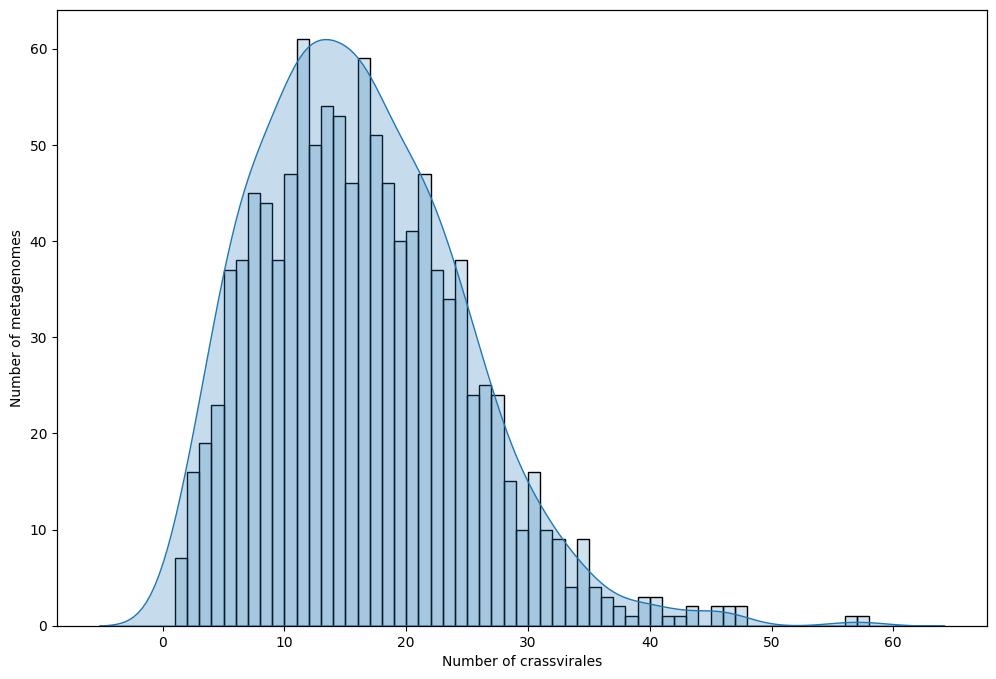

In [92]:
max = {}
second_max = {}
samples = {}
c=0
for index, row in contigs[['sample', 'reads']].iterrows():
    s = row['sample']
    r = int(row['reads'])
    #if r < 10:
    #    continue
    if s not in max:
        max[s] = 0
        second_max[s] = 1
        samples[s] = []
    if r > max[s]:
        if max[s] > second_max[s]:
            second_max[s] = max[s]
        max[s] = r
    elif r > second_max[s]:
        second_max[s] = r
    samples[s].append(r)
    c += 1
    #if c > 100:
    #    break

num_samples = [len(samples[x]) for x in samples]
maxes = [max[x]/second_max[x] for x in samples]

maxfactor = 10
maxes = [x if x < maxfactor else maxfactor for x in maxes]
"""

num_samples = [x if x < maxsamples else maxsamples for x in num_samples]
"""
maxsamples = 100
maxfactor = 50000
num_samples = [1 if maxes[i] > maxfactor else maxsamples if j > maxsamples else j for i,j in enumerate(num_samples)]
#fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12,8))
sns.histplot(x=num_samples, ax=ax, binwidth=1, alpha=0.2)
ax2 = plt.twinx()
sns.kdeplot(x=num_samples, ax=ax2, fill=True)
#sns.histplot(x=maxes, bins=20, ax=ax2)
ax.set_ylabel("Number of metagenomes")
ax2.set_ylabel("")
ax2.set_yticklabels([])
ax2.set_yticks([])
ax.set_xlabel("Number of crassvirales")
fig.savefig("hist.png")

## How many crassphage families are there?

In [93]:
contigs

,sample,contig,length,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,medianFold
0,7544,contig_10493,18937,2,0.06,0.06,0.35,0.05,0.3441,4.18,792,0.28
1,7544,contig_1091,145297,3,0.01,0.01,0.03,0.01,0.3817,0.50,724,0.07
2,7544,contig_12034,21580,485,11.80,11.78,57.58,9.03,0.3575,85.35,18418,8.32
3,7544,contig_12041,29559,266,4.73,4.73,20.76,3.25,0.3691,66.94,19786,4.40
4,7544,contig_12042,11863,108,4.78,4.78,20.00,3.13,0.3659,64.55,7658,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...
18474,38211,contig_5776,88456,6,0.03,0.03,0.11,0.02,0.3260,0.96,853,0.23
18475,38211,contig_7024,36085,6,0.08,0.08,0.22,0.04,0.3279,3.68,1328,0.23
18476,38211,contig_7034,16937,1,0.03,0.00,0.07,0.01,0.3478,1.38,234,0.12
18477,38211,contig_7054,34118,4,0.06,0.06,0.19,0.04,0.3275,2.98,1016,0.22


In [94]:
crassshort

,contig,length,ref,coding,family
0,contig_241570,182976,Zeta_2,11,Zeta
1,contig_8225,178222,Zeta_3_1,11,Zeta
2,contig_1091,145297,Epsilon_2_3,11,Epsilon
3,contig_1857,141010,Epsilon_1,11,Epsilon
4,contig_17571,113452,Zeta_7_1,TGA,Zeta
...,...,...,...,...,...
106,contig_7298,11376,Buorbuivirus,TAG,Suoliviridae
107,contig_20815,11243,Kolpuevirus hominis,11,Steigviridae
108,contig_239060,10591,Carjivirus communis,11,Intestiviridae
109,contig_240585,10264,Dabirmavirus,11,Intestiviridae


In [96]:
annocontall = contigs.merge(crassshort, on='contig')
annocontall

,sample,contig,length_x,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,medianFold,length_y,ref,coding,family
0,7544,contig_10493,18937,2,0.06,0.06,0.35,0.05,0.3441,4.18,792,0.28,18937,Jahgtovirus intestinalis,11,Intestiviridae
1,7550,contig_10493,18937,3080,141.56,141.56,204.70,51.96,0.3441,99.22,18790,54.63,18937,Jahgtovirus intestinalis,11,Intestiviridae
2,7556,contig_10493,18937,2,0.07,0.07,0.24,0.04,0.3441,2.44,463,0.25,18937,Jahgtovirus intestinalis,11,Intestiviridae
3,7574,contig_10493,18937,1,0.03,0.00,0.04,0.01,0.3441,1.24,235,0.11,18937,Jahgtovirus intestinalis,11,Intestiviridae
4,7591,contig_10493,18937,3691,310.63,310.55,839.69,72.59,0.3441,99.96,18930,85.22,18937,Jahgtovirus intestinalis,11,Intestiviridae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18474,35550,contig_242903,19918,679,27.46,27.42,108.24,11.24,0.3685,83.77,16685,16.27,19918,Pipoluvirus,11,Steigviridae
18475,35579,contig_242903,19918,44,4.76,4.76,18.71,0.74,0.3685,32.79,6532,1.34,19918,Pipoluvirus,11,Steigviridae
18476,35651,contig_242903,19918,132,5.38,5.38,15.28,2.12,0.3685,50.95,10148,3.49,19918,Pipoluvirus,11,Steigviridae
18477,35690,contig_242903,19918,273,7.10,7.07,23.00,4.04,0.3685,61.78,12306,6.13,19918,Pipoluvirus,11,Steigviridae


In [ ]:
samples = {}
fcounts = {}
c=0
for index, row in annocontall[['sample', 'reads', 'family']].iterrows():
    s = row['sample']
    f = row['family']
    r = int(row['reads'])
    if s not in samples:
        samples[s] = set()
        fcounts[s] = {}
        
    samples[s].add(f)
    fcounts[s][f] = fcounts[s].get(f, 0) + r

num_fams = [len(samples[x]) for x in samples]
for s in fcounts:
    if len(fcounts[s]) == 5: 
        print(fcounts[s])
# maxsamples = 100
# maxfactor = 50000
# num_samples = [1 if maxes[i] > maxfactor else maxsamples if j > maxsamples else j for i,j in enumerate(num_samples)]

#fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12,8))
sns.histplot(x=num_fams, ax=ax, binwidth=1, alpha=0.2)
xpos = [x+0.5 for x in ax.get_xticks()]
ax.set_xticks(xpos, map(int, ax.get_xticks()))
ax.set_ylabel("Number of metagenomes")
ax.set_xlabel("Number of crassvirales families")
fig.savefig("hist.png")

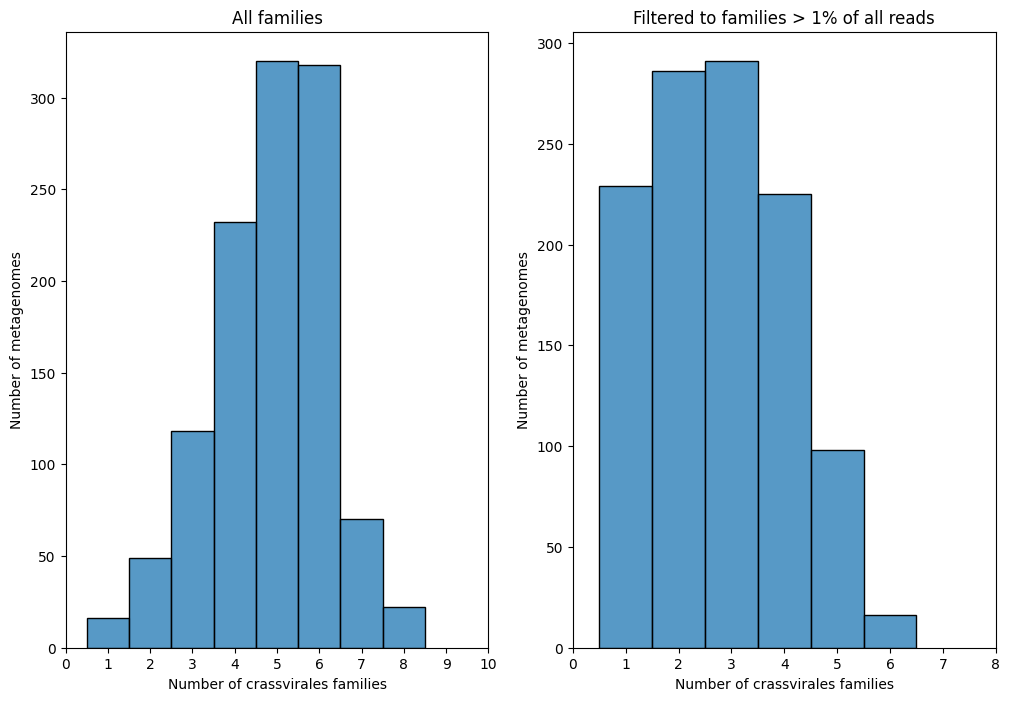

In [144]:
fcounts = {}
ftotal = {}
c=0
all_samples = {}
for index, row in annocontall[['sample', 'reads', 'family']].iterrows():
    s = row['sample']
    f = row['family']
    r = int(row['reads'])
    if s not in fcounts:
        all_samples[s] = set()
        fcounts[s] = {}
        ftotal[s] = 0

    all_samples[s].add(f)
    fcounts[s][f] = fcounts[s].get(f, 0) + r
    ftotal[s] += r

samples = {}
minper = 0.01
for s in fcounts:
    samples[s] = set([x if fcounts[s][x]/ftotal[s] > minper else None for x in fcounts[s]])

num_fams = [len(samples[x])-1 if len(samples[x])-1 > 0 else 1 for x in samples]
all_num_fams = [len(all_samples[x]) for x in all_samples]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))

g = sns.histplot(x=all_num_fams, ax=ax[0], binwidth=1)
gxpos = [x+0.5 for x in g.get_xticks()]
g.set_xticks(gxpos, map(int, g.get_xticks()))
g.set_title("All families")
g.set_ylabel("Number of metagenomes")
g.set_xlabel("Number of crassvirales families")


h = sns.histplot(x=num_fams, ax=ax[1], binwidth=1)
hxpos = [x+0.5 for x in h.get_xticks()]
h.set_xticks(hxpos, map(int, h.get_xticks()))
h.set_title("Filtered to families > 1% of all reads")
h.set_ylabel("Number of metagenomes")
h.set_xlabel("Number of crassvirales families")
fig.savefig("crassphage_1percent.png")

## How many metagenomes have crevaviridae, suloviridae and unclassified crAsspahge

In [145]:
annocontall

,sample,contig,length_x,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,medianFold,length_y,ref,coding,family
0,7544,contig_10493,18937,2,0.06,0.06,0.35,0.05,0.3441,4.18,792,0.28,18937,Jahgtovirus intestinalis,11,Intestiviridae
1,7550,contig_10493,18937,3080,141.56,141.56,204.70,51.96,0.3441,99.22,18790,54.63,18937,Jahgtovirus intestinalis,11,Intestiviridae
2,7556,contig_10493,18937,2,0.07,0.07,0.24,0.04,0.3441,2.44,463,0.25,18937,Jahgtovirus intestinalis,11,Intestiviridae
3,7574,contig_10493,18937,1,0.03,0.00,0.04,0.01,0.3441,1.24,235,0.11,18937,Jahgtovirus intestinalis,11,Intestiviridae
4,7591,contig_10493,18937,3691,310.63,310.55,839.69,72.59,0.3441,99.96,18930,85.22,18937,Jahgtovirus intestinalis,11,Intestiviridae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18474,35550,contig_242903,19918,679,27.46,27.42,108.24,11.24,0.3685,83.77,16685,16.27,19918,Pipoluvirus,11,Steigviridae
18475,35579,contig_242903,19918,44,4.76,4.76,18.71,0.74,0.3685,32.79,6532,1.34,19918,Pipoluvirus,11,Steigviridae
18476,35651,contig_242903,19918,132,5.38,5.38,15.28,2.12,0.3685,50.95,10148,3.49,19918,Pipoluvirus,11,Steigviridae
18477,35690,contig_242903,19918,273,7.10,7.07,23.00,4.04,0.3685,61.78,12306,6.13,19918,Pipoluvirus,11,Steigviridae


In [153]:
annocontall.groupby(['family'])['sample'].nunique()

family
Crevaviridae       866
Epsilon            912
Intestiviridae    1015
Steigviridae       667
Suoliviridae      1072
Zeta               752
outgroup            37
unknown             85
Name: sample, dtype: int64

In [158]:
fcounts = {}
ftotal = {}
c=0
all_samples = {}
for index, row in annocontall[['sample', 'reads', 'family']].iterrows():
    s = row['sample']
    f = row['family']
    r = int(row['reads'])
    if s not in fcounts:
        all_samples[s] = set()
        fcounts[s] = {}
        ftotal[s] = 0

    all_samples[s].add(f)
    fcounts[s][f] = fcounts[s].get(f, 0) + r
    ftotal[s] += r

samples = {}
minper = 0.01
for s in fcounts:
    samples[s] = set([x if fcounts[s][x]/ftotal[s] > minper else None for x in fcounts[s]])

fams = {}
for s in samples:
    for f in samples[s]:
        if f not in fams:
            fams[f] = set()
        fams[f].add(s)
l = {x:len(fams[x]) for x in fams}
print(l)


{'Crevaviridae': 526, 'Zeta': 380, None: 815, 'Intestiviridae': 716, 'Suoliviridae': 844, 'Steigviridae': 340, 'Epsilon': 579, 'outgroup': 10, 'unknown': 36, nan: 45}


## Answer Dave's question:

There are "8" crevaviridae contigs (are there? -- yes, there are!) but they are present at >1% in 526 samples (see previous box). Which samples are they most abundant in?

In [179]:
crev = crassshort[crassshort['family'] == 'Crevaviridae']

In [180]:
annocrev = contigs.merge(crev, on='contig')
annocrev

,sample,contig,length_x,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,medianFold,length_y,ref,coding,family
0,7544,contig_3325,29397,24,0.43,0.43,1.69,0.27,0.3057,4.45,1308,1.58,29397,Junduvirus copri,11,Crevaviridae
1,7576,contig_3325,29397,110,1.80,1.80,10.10,1.17,0.3057,5.99,1762,7.35,29397,Junduvirus copri,11,Crevaviridae
2,7589,contig_3325,29397,7,0.14,0.12,0.63,0.08,0.3057,1.79,527,0.63,29397,Junduvirus copri,11,Crevaviridae
3,7616,contig_3325,29397,80,1.57,1.57,4.52,0.83,0.3057,4.33,1272,4.96,29397,Junduvirus copri,11,Crevaviridae
4,10569,contig_3325,29397,2,0.69,0.69,4.53,0.02,0.3057,1.44,422,0.19,29397,Junduvirus copri,11,Crevaviridae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,38207,contig_18154,20165,8,0.13,0.13,0.35,0.16,0.3311,11.12,2242,0.47,20165,Kingevirus communis,11,Crevaviridae
2946,38208,contig_18154,20165,2,0.04,0.04,0.07,0.03,0.3311,2.13,429,0.23,20165,Kingevirus communis,11,Crevaviridae
2947,38209,contig_18154,20165,2,0.07,0.07,0.26,0.04,0.3311,2.41,486,0.24,20165,Kingevirus communis,11,Crevaviridae
2948,38210,contig_18154,20165,7,0.13,0.11,0.18,0.11,0.3311,7.55,1522,0.39,20165,Kingevirus communis,11,Crevaviridae


In [181]:
annocrev['contig'].unique()

array(['contig_3325', 'contig_3469', 'contig_239885', 'contig_7024',
       'contig_7034', 'contig_7091', 'contig_7054', 'contig_18154'],
      dtype=object)

## Sum the total reads

This is all reads. 

In [188]:
read_count = pd.DataFrame(contigs.groupby('contig').sum('reads')['reads'])
read_count

,reads
contig,
contig_10396,165970
contig_10493,84844
contig_10752,32611
contig_10753,32863
contig_10809,2266911
...,...
contig_8448,267555
contig_8451,354655
contig_9031,215398


In [189]:
annocrev

,sample,contig,length_x,reads,RPKM,FPKM,SPM,averageFold,referenceGC,coveragePercentage,coverageBases,medianFold,length_y,ref,coding,family
0,7544,contig_3325,29397,24,0.43,0.43,1.69,0.27,0.3057,4.45,1308,1.58,29397,Junduvirus copri,11,Crevaviridae
1,7576,contig_3325,29397,110,1.80,1.80,10.10,1.17,0.3057,5.99,1762,7.35,29397,Junduvirus copri,11,Crevaviridae
2,7589,contig_3325,29397,7,0.14,0.12,0.63,0.08,0.3057,1.79,527,0.63,29397,Junduvirus copri,11,Crevaviridae
3,7616,contig_3325,29397,80,1.57,1.57,4.52,0.83,0.3057,4.33,1272,4.96,29397,Junduvirus copri,11,Crevaviridae
4,10569,contig_3325,29397,2,0.69,0.69,4.53,0.02,0.3057,1.44,422,0.19,29397,Junduvirus copri,11,Crevaviridae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,38207,contig_18154,20165,8,0.13,0.13,0.35,0.16,0.3311,11.12,2242,0.47,20165,Kingevirus communis,11,Crevaviridae
2946,38208,contig_18154,20165,2,0.04,0.04,0.07,0.03,0.3311,2.13,429,0.23,20165,Kingevirus communis,11,Crevaviridae
2947,38209,contig_18154,20165,2,0.07,0.07,0.26,0.04,0.3311,2.41,486,0.24,20165,Kingevirus communis,11,Crevaviridae
2948,38210,contig_18154,20165,7,0.13,0.11,0.18,0.11,0.3311,7.55,1522,0.39,20165,Kingevirus communis,11,Crevaviridae


In [197]:
acs = annocrev[['sample', 'contig', 'reads']].set_index('contig')
acs['read_total'] = read_count
acs['read_percent'] = acs['reads']/acs['read_total']*100
acs

,sample,reads,read_total,read_percent
contig,,,,
contig_3325,7544,24,250057,0.009598
contig_3325,7576,110,250057,0.043990
contig_3325,7589,7,250057,0.002799
contig_3325,7616,80,250057,0.031993
contig_3325,10569,2,250057,0.000800
...,...,...,...,...
contig_18154,38207,8,426792,0.001874
contig_18154,38208,2,426792,0.000469
contig_18154,38209,2,426792,0.000469


In [201]:
acs[acs['read_percent'] > 1]

,sample,reads,read_total,read_percent
contig,,,,
contig_3325,19045,5103,250057,2.040735
contig_3325,35540,29745,250057,11.895288
contig_3325,35591,63264,250057,25.299832
contig_3325,35655,11395,250057,4.556961
contig_3325,35691,15412,250057,6.163395
...,...,...,...,...
contig_18154,38146,28734,426792,6.732554
contig_18154,38178,31082,426792,7.282704
contig_18154,38183,38037,426792,8.912304


## Sum just the crAssphage reads

In [219]:
read_count = pd.DataFrame(annocontall.groupby('contig').sum('reads')['reads'])
read_count

,reads
contig,
contig_10396,165970
contig_10493,84844
contig_10752,32611
contig_10753,32863
contig_10809,2266911
...,...
contig_8448,267555
contig_8451,354655
contig_9031,215398


In [220]:
accs = annocrev[['sample', 'contig', 'reads']].set_index('contig')
accs['read_total'] = read_count
accs['read_percent'] = acs['reads']/acs['read_total']*100
accs

,sample,reads,read_total,read_percent
contig,,,,
contig_3325,7544,24,250057,0.009598
contig_3325,7576,110,250057,0.043990
contig_3325,7589,7,250057,0.002799
contig_3325,7616,80,250057,0.031993
contig_3325,10569,2,250057,0.000800
...,...,...,...,...
contig_18154,38207,8,426792,0.001874
contig_18154,38208,2,426792,0.000469
contig_18154,38209,2,426792,0.000469


In [222]:
accs[accs['read_percent'] > 1]

,sample,reads,read_total,read_percent
contig,,,,
contig_3325,19045,5103,250057,2.040735
contig_3325,35540,29745,250057,11.895288
contig_3325,35591,63264,250057,25.299832
contig_3325,35655,11395,250057,4.556961
contig_3325,35691,15412,250057,6.163395
...,...,...,...,...
contig_18154,38146,28734,426792,6.732554
contig_18154,38178,31082,426792,7.282704
contig_18154,38183,38037,426792,8.912304


In [268]:
crass_count_sample = pd.DataFrame(contigs.groupby('sample').sum('reads')['reads'])

acssum = annocrev[['sample', 'contig', 'reads']].groupby('sample').sum()
acssum['crassphage_total'] = crass_count_sample
acssum['total_reads'] = sample_seq_counts
acssum['crassphage_percent'] = acssum['reads']/acssum['crassphage_total']*100
acssum['crassphage_percent_all'] = acssum['reads']/acssum['total_reads'] * 100
acssum[acssum['crassphage_percent'] > 1].sort_values('crassphage_percent_all', ascending=False)

,contig,reads,crassphage_total,total_reads,crassphage_percent,crassphage_percent_all
sample,,,,,,
7571,contig_7024contig_7034contig_7091contig_7054co...,951915,953285,1159940,99.856286,82.065883
15049,contig_3325contig_3469contig_239885contig_7024...,744762,832907,1312648,89.417186,56.737374
18956,contig_3325contig_3469contig_7024contig_7034co...,481670,504409,904091,95.491952,53.276717
38178,contig_3469contig_7024contig_7034contig_7091co...,416656,424686,809127,98.109191,51.494512
38183,contig_3469contig_7024contig_7034contig_7091co...,462244,462620,996829,99.918724,46.371444
...,...,...,...,...,...,...
19006,contig_7091,2,64,1562535,3.125000,0.000128
35418,contig_7034,1,71,799473,1.408451,0.000125
35562,contig_3469,2,171,1864010,1.169591,0.000107


In [256]:

read_count_all

,reads
sample,
7544,160888
7547,133984
7548,22288
7550,19035
7553,51325
...,...
38207,168823
38208,92856
38209,192


# Repeat for Suoliviridae

In [273]:
annosuol = contigs.merge(crassshort[crassshort['family'] == 'Suoliviridae'], on='contig') 
soulsum = annosuol[['sample', 'contig', 'reads']].groupby('sample').sum()
soulsum['crassphage_total'] = crass_count_sample
soulsum['total_reads'] = sample_seq_counts
soulsum['crassphage_percent'] = soulsum['reads']/soulsum['crassphage_total']*100
soulsum['crassphage_percent_all'] = soulsum['reads']/soulsum['total_reads'] * 100
soulsum[soulsum['crassphage_percent'] > 1].sort_values('crassphage_percent_all', ascending=False)

,contig,reads,crassphage_total,total_reads,crassphage_percent,crassphage_percent_all
sample,,,,,,
33886,contig_5621contig_5776contig_5617,830355,877641,988239,94.612148,84.023703
38158,contig_241592contig_3100,340438,340693,490993,99.925153,69.336630
34028,contig_5621contig_5776contig_5617contig_11105,183252,188388,321330,97.273712,57.029222
12285,contig_241883contig_5621contig_5776contig_1080...,521990,536286,1059383,97.334258,49.273020
33862,contig_13525contig_5621contig_5776contig_11002...,572248,574334,1202030,99.636797,47.606798
...,...,...,...,...,...,...
14966,contig_3100,1,5,513692,20.000000,0.000195
38122,contig_17442,2,49,1029590,4.081633,0.000194
35580,contig_7377,1,39,556557,2.564103,0.000180


In [272]:
wehave

{33855,
 33856,
 33857,
 33858,
 33859,
 33860,
 33861,
 33862,
 33863,
 33865,
 33866,
 33867,
 33868,
 33869,
 33870,
 33871,
 33872,
 33877,
 33878,
 33879,
 33880,
 33881,
 33882,
 33883,
 33884,
 33887,
 33888,
 33890,
 33891,
 33893,
 33895,
 33896,
 33897,
 33898,
 33901,
 33902,
 33906,
 33907,
 33908,
 33909,
 33910,
 33911,
 33913,
 33914,
 33915,
 33916,
 33917,
 33922,
 33924,
 33925,
 33926,
 33929,
 33931,
 33932,
 33936,
 33937,
 33939,
 33940,
 33941,
 33942,
 33943,
 33947,
 33949,
 33950,
 33951,
 33953,
 33954,
 33955,
 33957,
 33958,
 33959,
 33960,
 33961,
 33963,
 33964,
 33965,
 33966,
 33968,
 33969,
 33970,
 33972,
 33973,
 33974,
 33975,
 33976,
 33978,
 33979,
 33980,
 33981,
 33982,
 33983,
 33984,
 33988,
 33989,
 33991,
 33992,
 33993,
 33995,
 33996,
 33997,
 33998,
 33999,
 34000,
 34001,
 34002,
 34003,
 34006,
 34007,
 34008,
 34009,
 34010,
 34011,
 34012,
 34013,
 34015,
 34018,
 34019,
 34020,
 34022,
 34024,
 34027,
 34028,
 34029,
 34030,
 34031,
